## Overview

This notebook explores the Datafiniti Hotel Reviews dataset provided on [Kaggle](https://www.kaggle.com/datafiniti/hotel-reviews)

In [90]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [168]:
# Data processing
import pandas as pd
from urllib.parse import urlparse
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# ML modeling
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from wordcloud import WordCloud
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
import gensim
import gensim.corpora as corpora
from pprint import pprint

# DL modeling
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from ss_package.utils import plot_loss_accuracy

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\njeri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\njeri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\njeri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load data

In [4]:
df_1 = pd.read_csv('data/Datafiniti_Hotel_Reviews.csv')
df_1.shape

(10000, 25)

In [5]:
df_2 = pd.read_csv('data/Datafiniti_Hotel_Reviews_Jun19.csv')
df_2.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites'],
      dtype='object')

In [6]:
# Make sure columns match before concatenating
df_2 = df_2.drop(columns='reviews.dateAdded')
df_2.shape

(10000, 25)

In [7]:
data = pd.concat([df_1, df_2], ignore_index=True)
data.shape

(20000, 25)

In [8]:
data.head(3)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com


In [9]:
data.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateSeen',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username',
       'sourceURLs', 'websites'],
      dtype='object')

## Look for missing values

In [10]:
data.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
address                    0
categories                 0
primaryCategories          0
city                       0
country                    0
keys                       0
latitude                   0
longitude                  0
name                       0
postalCode                 0
province                   0
reviews.date               0
reviews.dateSeen           0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               1
reviews.title              2
reviews.userCity        5836
reviews.userProvince    7297
reviews.username           0
sourceURLs                 0
websites                   0
dtype: int64

In [11]:
# ~30% or more of data missing
data = data.drop(columns=['reviews.userCity', 'reviews.userProvince'])
data.shape

(20000, 23)

In [12]:
data.isnull().sum()

id                    0
dateAdded             0
dateUpdated           0
address               0
categories            0
primaryCategories     0
city                  0
country               0
keys                  0
latitude              0
longitude             0
name                  0
postalCode            0
province              0
reviews.date          0
reviews.dateSeen      0
reviews.rating        0
reviews.sourceURLs    0
reviews.text          1
reviews.title         2
reviews.username      0
sourceURLs            0
websites              0
dtype: int64

In [13]:
# NLP of reviews therefore drop missing reviews
data = data.dropna()
data.shape

(19997, 23)

## Handle time data

- dateAdded is date info was added to Datafiniti - not needed for this exercise
- remove dateUpdated column
- remove dateAdded column
- remove reviews.dateSeen - not needed for this exercise
- convert review.date to date/time dtype:
    - parse month and year to separate columns
    - create season column

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19997 non-null  object 
 1   dateAdded           19997 non-null  object 
 2   dateUpdated         19997 non-null  object 
 3   address             19997 non-null  object 
 4   categories          19997 non-null  object 
 5   primaryCategories   19997 non-null  object 
 6   city                19997 non-null  object 
 7   country             19997 non-null  object 
 8   keys                19997 non-null  object 
 9   latitude            19997 non-null  float64
 10  longitude           19997 non-null  float64
 11  name                19997 non-null  object 
 12  postalCode          19997 non-null  object 
 13  province            19997 non-null  object 
 14  reviews.date        19997 non-null  object 
 15  reviews.dateSeen    19997 non-null  object 
 16  revi

In [15]:
data = data.drop(columns=['dateAdded', 'dateUpdated', 'reviews.dateSeen'])
data.shape

(19997, 20)

In [16]:
data['reviews.date'] = pd.to_datetime(data['reviews.date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  19997 non-null  object             
 1   address             19997 non-null  object             
 2   categories          19997 non-null  object             
 3   primaryCategories   19997 non-null  object             
 4   city                19997 non-null  object             
 5   country             19997 non-null  object             
 6   keys                19997 non-null  object             
 7   latitude            19997 non-null  float64            
 8   longitude           19997 non-null  float64            
 9   name                19997 non-null  object             
 10  postalCode          19997 non-null  object             
 11  province            19997 non-null  object             
 12  reviews.date        19997 non-nu

In [17]:
data['month'] = data['reviews.date'].dt.month
data['year'] = data['reviews.date'].dt.year
data.head()

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,...,reviews.date,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,websites,month,year
0,AVwc252WIN2L1WUfpqLP,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,...,2013-11-14 00:00:00+00:00,5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,11,2013
1,AVwc252WIN2L1WUfpqLP,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,...,2014-07-06 00:00:00+00:00,5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,7,2014
2,AVwc252WIN2L1WUfpqLP,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,-117.186136,Rancho Valencia Resort Spa,...,2015-01-02 00:00:00+00:00,5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,1,2015
3,AVwdOclqIN2L1WUfti38,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,...,2016-05-15 00:00:00+00:00,2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,5,2016
4,AVwdOclqIN2L1WUfti38,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,-76.716341,Aloft Arundel Mills,...,2016-07-09 00:00:00+00:00,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,7,2016


In [18]:
data = data.drop(columns='reviews.date')
data.shape

(19997, 21)

In [19]:
def season(month):
    if month >= 1 and month <= 2:
        return 'winter'
    if month >= 3 and month <= 5:
        return 'spring'
    if month >= 6 and month <= 8:
        return 'summer'
    if month >= 9 and month <= 11:
        return 'fall'
    if month == 12:
        return 'winter'

data['visit_season'] = data['month'].map(season)
data.tail()

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,websites,month,year,visit_season
19995,AVwdatg0ByjofQCxo5S5,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,-76.393310,Hampton Inn Hampton-newport News,...,4.0,http://www.tripadvisor.com/Hotel_Review-g57804...,My friends and I took a trip to Hampton for th...,Very accommodating and friendly staff!,Tiffany1017,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...,12,2015,winter
19996,AVwdatg0ByjofQCxo5S5,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,-76.393310,Hampton Inn Hampton-newport News,...,5.0,http://www.tripadvisor.com/Hotel_Review-g57804...,"from check in to departure, staff is friendly,...","comfortable, friendly, clean, professional",bobg187,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...,11,2015,fall
19997,AVwdatg0ByjofQCxo5S5,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,-76.393310,Hampton Inn Hampton-newport News,...,5.0,https://www.tripadvisor.com/Hotel_Review-g5780...,This Hampton is located on a quiet street acro...,Great location,K261ANbrendah,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...,7,2016,summer
19998,AV1thTgM3-Khe5l_OvT5,7886 Main Street,"Hotels,Bar,Hotel,Restaurants",Accommodation & Food Services,Hunter,US,us/ny/hunter/7886mainstreet/-435384771,42.210915,-74.215309,Roseberry's Inn,...,5.0,https://www.tripadvisor.com/Hotel_Review-g4793...,Awesome wings (my favorite was garlic parmesan...,Great Atmosphere!,soccerrocks2016,https://www.bbb.org/us/ny/hunter/profile/hotel...,http://www.roseberrysinnhunter.com/,10,2016,fall
19999,AV1tg9C7a4HuVbed8XA5,3505 S Main St,"Hotels,Hotels and motels,Corporate Lodging,Lod...",Accommodation & Food Services,Lindale,US,us/tx/lindale/3505smainst/-147603681,32.469540,-95.390420,Hampton Inn-lindale/tyler,...,4.0,http://tripadvisor.com/Hotel_Review-g56167-d22...,Clean facility just off freeway ..... staff fr...,Health care appointments,tootallsmith,https://www.yellowpages.com/lindale-tx/mip/ham...,http://hamptoninn3.hilton.com/en/hotels/texas/...,6,2017,summer


## Explore each column

In [20]:
data.id.nunique()

2975

In [21]:
data.address.nunique()

2970

In [22]:
data.categories.nunique()

1652

In [23]:
data.primaryCategories.unique()

array(['Accommodation & Food Services',
       'Healthcare & Social Assistance,Accommodation & Food Services',
       'Accommodation & Food Services,Arts Entertainment & Recreation',
       'Arts Entertainment & Recreation',
       'Wholesale Trade,Accommodation & Food Services', 'Utilities',
       'Accommodation & Food Services,Administrative & Support & Waste Management & Remediation',
       'Accommodation & Food Services,Agriculture'], dtype=object)

In [24]:
data.city.nunique()

1416

In [25]:
data.country.nunique()

1

In [26]:
# All reviews in US
data = data.drop(columns='country')
data.shape

(19997, 21)

In [27]:
data['keys'].nunique()

2976

In [28]:
data.name.nunique()

2764

In [29]:
data.province.nunique()

50

In [30]:
data['reviews.rating'].unique()

array([5.  , 2.  , 4.  , 3.  , 1.  , 4.8 , 4.6 , 3.55, 4.4 , 4.15, 2.5 ,
       3.95, 2.9 , 3.35, 3.75, 4.5 , 2.1 , 1.65, 3.15, 2.7 , 1.45, 2.75,
       2.3 , 3.5 , 4.25, 1.25, 1.9 , 3.45, 3.25, 4.75])

In [31]:
# Change reviews to categories rather than numbers
def review_map(rating):
    if rating == 5:
        return 'great'
    if rating >=4 and rating < 5:
        return 'good'
    if rating < 4:
        return 'not great'

data['cat_rating'] = data['reviews.rating'].map(review_map)
data['cat_rating'].tail()

19995     good
19996    great
19997    great
19998    great
19999     good
Name: cat_rating, dtype: object

In [32]:
data['reviews.sourceURLs'].nunique()

14256

In [33]:
def short_url(url):
    parsed = urlparse(url)
    short_url = parsed.netloc
    return short_url.replace('www.', '')

In [34]:
data['short_source'] = data['reviews.sourceURLs'].map(short_url)
data['short_source'].tail()

19995    tripadvisor.com
19996    tripadvisor.com
19997    tripadvisor.com
19998    tripadvisor.com
19999    tripadvisor.com
Name: short_source, dtype: object

In [35]:
# drop long URLs for modeling
data = data.drop(columns=['sourceURLs', 'websites'])
data.shape

(19997, 21)

In [36]:
data.columns

Index(['id', 'address', 'categories', 'primaryCategories', 'city', 'keys',
       'latitude', 'longitude', 'name', 'postalCode', 'province',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'month', 'year', 'visit_season', 'cat_rating',
       'short_source'],
      dtype='object')

----------------------------------------------------

- ID is unique identifier for hotel
- remove address column - city, state, lat/lon sufficient for location information
- remove keys column - not needed for this exercise
- split reviews.date to month & date of review and add season
- remove reviews.sourceURLs since short URLs created

-----------------------------------------

In [37]:
data = data.drop(columns=['address', 'keys', 'reviews.sourceURLs'])
data.shape

(19997, 18)

In [38]:
data['cat_rating'].value_counts()

great        9223
good         5749
not great    5025
Name: cat_rating, dtype: int64

In [39]:
data['visit_season'].value_counts()

summer    6177
spring    5338
fall      4537
winter    3945
Name: visit_season, dtype: int64

In [40]:
data['primaryCategories'].value_counts()

Accommodation & Food Services                                                              19916
Arts Entertainment & Recreation                                                               45
Healthcare & Social Assistance,Accommodation & Food Services                                  18
Accommodation & Food Services,Arts Entertainment & Recreation                                  8
Wholesale Trade,Accommodation & Food Services                                                  7
Accommodation & Food Services,Agriculture                                                      1
Accommodation & Food Services,Administrative & Support & Waste Management & Remediation        1
Utilities                                                                                      1
Name: primaryCategories, dtype: int64

In [41]:
data['year'].value_counts()

2016    6916
2015    4618
2017    2508
2014    1652
2018    1269
2013    1135
2012     692
2011     418
2010     223
2009     167
2007     135
2008     122
2006      42
2019      40
2005      32
2004      22
2003       5
2002       1
Name: year, dtype: int64

---------------------------------------

- Remove primaryCategories column - all categories can be considered accommodation & food services
- Remove reviews.username - not applicaple for aggregation

---------------------------------------

In [42]:
data = data.drop(columns=['primaryCategories', 'reviews.username'])
data.shape

(19997, 16)

## Process text columns

✅ pip install NLTK <br>
✅ create functions in data.py to clean text:<br>
- remove numbers
- remove punctuation
- convert all text to lower case
- remove stopwords
- lemmatize words <br>

✅ add any functions used in cleaning data above to data.py & create classes <br>
✅ create review_richness column (i.e introduce vocabulary richness feature) <br>
✅ add richness functions to data.py <br>
✅ test data.py

In [43]:
def punc_remover(df, new_col, old_col):
    df[new_col] = df[old_col]
    for punctuation in string.punctuation:
        df[new_col] = df[new_col].map(lambda x: x.replace(punctuation, '')) 
    return df

def lower_case(df, new_col):
    df[new_col] = df[new_col].map(lambda x: x.lower())
    return df

def remove_num(df, new_col):
    df[new_col] = df[new_col].map(lambda x: ''.join(word for word in x if not word.isdigit()))
    return df

def remove_stop(df, new_col):
    stop_words = set(stopwords.words('english')) 
    df[new_col] = df[new_col].map(word_tokenize) 
    df[new_col] = df[new_col].map(lambda x: ' '.join(w for w in x if not w in stop_words))
    return df

def lemmatize(df, new_col):
    df[new_col] = df[new_col].map(word_tokenize)
    lemmatizer = WordNetLemmatizer()
    df[new_col] = df[new_col].map(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x))
    return df

def proc_text(df, new_col, old_col):
    punc_remover(df, new_col, old_col)
    lower_case(df, new_col)
    remove_num(df, new_col)
    remove_stop(df, new_col)
    lemmatize(df, new_col)
    df = df.drop(columns=old_col, inplace=True)
    return df

In [44]:
data.columns

Index(['id', 'categories', 'city', 'latitude', 'longitude', 'name',
       'postalCode', 'province', 'reviews.rating', 'reviews.text',
       'reviews.title', 'month', 'year', 'visit_season', 'cat_rating',
       'short_source'],
      dtype='object')

In [45]:
# Process categories column
proc_text(data, 'clean_categories', 'categories')
data.head()

,id,city,latitude,longitude,name,postalCode,province,reviews.rating,reviews.text,reviews.title,month,year,visit_season,cat_rating,short_source,clean_categories
0,AVwc252WIN2L1WUfpqLP,Rancho Santa Fe,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,11,2013,fall,great,hotels.com,hotelshotels motelshotel motel reservationsres...
1,AVwc252WIN2L1WUfpqLP,Rancho Santa Fe,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,7,2014,summer,great,hotels.com,hotelshotels motelshotel motel reservationsres...
2,AVwc252WIN2L1WUfpqLP,Rancho Santa Fe,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,5.0,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,1,2015,winter,great,hotels.com,hotelshotels motelshotel motel reservationsres...
3,AVwdOclqIN2L1WUfti38,Hanover,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,2.0,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",5,2016,spring,not great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...
4,AVwdOclqIN2L1WUfti38,Hanover,39.155929,-76.716341,Aloft Arundel Mills,21076,MD,5.0,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,7,2016,summer,great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...


In [46]:
# Process remaining text columns
proc_text(data, 'clean_city', 'city')
proc_text(data, 'clean_state', 'province')
proc_text(data, 'clean_title', 'reviews.title')
proc_text(data, 'clean_review', 'reviews.text')
proc_text(data, 'clean_name', 'name')
data.head()

,id,latitude,longitude,postalCode,reviews.rating,month,year,visit_season,cat_rating,short_source,clean_categories,clean_city,clean_state,clean_title,clean_review,clean_name
0,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,11,2013,fall,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,best romantic vacation ever,experience rancho valencia absolutely perfect ...,rancho valencia resort spa
1,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,7,2014,summer,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,sweet sweet serenity,amazing place everyone extremely warm welcomin...,rancho valencia resort spa
2,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,1,2015,winter,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,amazing property experience,booked night stay rancho valencia play tennis ...,rancho valencia resort spa
3,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,2.0,5,2016,spring,not great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,never againbeware want sleep,currently bed writing past hr dog barking sque...,aloft arundel mill
4,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,5.0,7,2016,summer,great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,always great stay,live md aloft home away homewe stayed night st...,aloft arundel mill


In [47]:
data.head()

,id,latitude,longitude,postalCode,reviews.rating,month,year,visit_season,cat_rating,short_source,clean_categories,clean_city,clean_state,clean_title,clean_review,clean_name
0,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,11,2013,fall,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,best romantic vacation ever,experience rancho valencia absolutely perfect ...,rancho valencia resort spa
1,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,7,2014,summer,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,sweet sweet serenity,amazing place everyone extremely warm welcomin...,rancho valencia resort spa
2,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,1,2015,winter,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,amazing property experience,booked night stay rancho valencia play tennis ...,rancho valencia resort spa
3,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,2.0,5,2016,spring,not great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,never againbeware want sleep,currently bed writing past hr dog barking sque...,aloft arundel mill
4,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,5.0,7,2016,summer,great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,always great stay,live md aloft home away homewe stayed night st...,aloft arundel mill


In [48]:
data.loc[data['clean_review'] == '']

,id,latitude,longitude,postalCode,reviews.rating,month,year,visit_season,cat_rating,short_source,clean_categories,clean_city,clean_state,clean_title,clean_review,clean_name
5805,AV48ic48a4HuVbedAUNM,38.89089,-77.073860,22209,5.0,5,2008,spring,great,expedia.com,hotelslodginghotelhotels motel,arlington,va,nice place stay,,virginian suite ascend hotel collection member
6198,AVwd0HO5ByjofQCxsvv8,33.70112,-84.098459,30038,5.0,6,2016,summer,great,hotels.com,hotelhotels,lithonia,ga,nice hotel,,hyatt place atlantaeastlithonia


In [49]:
data = data[data.clean_review != '']
data.shape

(19995, 16)

In [50]:
test = data.clean_review[0]
tokens = word_tokenize(test)
length = len(tokens)
unique = set(tokens)
unique_ct = len(unique)
richness = unique_ct/length
richness

1.0

In [51]:
def vocab_richness(text):
    tokens = word_tokenize(text)
    total_length = len(tokens)
    unique_words = set(tokens)
    unique_word_length = len(unique_words)
    return unique_word_length / total_length

data['review_richness'] = data.clean_review.apply(vocab_richness)
data.head()

,id,latitude,longitude,postalCode,reviews.rating,month,year,visit_season,cat_rating,short_source,clean_categories,clean_city,clean_state,clean_title,clean_review,clean_name,review_richness
0,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,11,2013,fall,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,best romantic vacation ever,experience rancho valencia absolutely perfect ...,rancho valencia resort spa,1.000000
1,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,7,2014,summer,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,sweet sweet serenity,amazing place everyone extremely warm welcomin...,rancho valencia resort spa,0.933333
2,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,1,2015,winter,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,amazing property experience,booked night stay rancho valencia play tennis ...,rancho valencia resort spa,0.914894
3,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,2.0,5,2016,spring,not great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,never againbeware want sleep,currently bed writing past hr dog barking sque...,aloft arundel mill,1.000000
4,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,5.0,7,2016,summer,great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,always great stay,live md aloft home away homewe stayed night st...,aloft arundel mill,1.000000


## Encode target data

In [133]:
ohe = OneHotEncoder(categories=[['good', 'great', 'not great']], sparse=False, handle_unknown='ignore')

ohe.fit(data[['cat_rating']])

rating_ohe = ohe.transform(data[['cat_rating']])

data["good"],data["great"],data['not great'] = rating_ohe.T

data.head()

,id,latitude,longitude,postalCode,reviews.rating,month,year,visit_season,cat_rating,short_source,clean_categories,clean_city,clean_state,clean_title,clean_review,clean_name,review_richness,good,great,not great
0,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,11,2013,fall,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,best romantic vacation ever,experience rancho valencia absolutely perfect ...,rancho valencia resort spa,1.000000,0.0,1.0,0.0
1,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,7,2014,summer,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,sweet sweet serenity,amazing place everyone extremely warm welcomin...,rancho valencia resort spa,0.933333,0.0,1.0,0.0
2,AVwc252WIN2L1WUfpqLP,32.990959,-117.186136,92067,5.0,1,2015,winter,great,hotels.com,hotelshotels motelshotel motel reservationsres...,rancho santa fe,ca,amazing property experience,booked night stay rancho valencia play tennis ...,rancho valencia resort spa,0.914894,0.0,1.0,0.0
3,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,2.0,5,2016,spring,not great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,never againbeware want sleep,currently bed writing past hr dog barking sque...,aloft arundel mill,1.000000,0.0,0.0,1.0
4,AVwdOclqIN2L1WUfti38,39.155929,-76.716341,21076,5.0,7,2016,summer,great,tripadvisor.com,hotelshotels motelstravel agency bureaushotel ...,hanover,md,always great stay,live md aloft home away homewe stayed night st...,aloft arundel mill,1.000000,0.0,1.0,0.0


## Machine Learning Methods
✅ vectorize with Tfidf Vectorizer (tune max_df, min_df, max_features, ngram_range) <br>
✅ create pipeline to tune vectorizer and Multinomial Naive Bayes (tune nb_alpha) algorithm together <br>
✅ establish baseline evaluation using DummyClassifier (use accuracy as metric) <br>
✅ use cross-validation, especially due to imbalance in data (mostly good reviews) <br>
✅ visualize reviews text with a word cloud as a baseline for LDA <br>
✅ train an LDA model to extract potential topics <br>
✅ create visualization of extracted topics <br>


### Multinomial Naive Bayes

In [52]:
data.columns

Index(['id', 'latitude', 'longitude', 'postalCode', 'reviews.rating', 'month',
       'year', 'visit_season', 'cat_rating', 'short_source',
       'clean_categories', 'clean_city', 'clean_state', 'clean_title',
       'clean_review', 'clean_name', 'review_richness'],
      dtype='object')

In [53]:
# text_features = ['short_source', 'visit_season', 'clean_categories', 'clean_city', 'clean_state', 'clean_title', \
#                  'clean_review', 'clean_name']
X = data.clean_review
y = data.cat_rating

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19995 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19995 non-null  object 
 1   latitude          19995 non-null  float64
 2   longitude         19995 non-null  float64
 3   postalCode        19995 non-null  object 
 4   reviews.rating    19995 non-null  float64
 5   month             19995 non-null  int64  
 6   year              19995 non-null  int64  
 7   visit_season      19995 non-null  object 
 8   cat_rating        19995 non-null  object 
 9   short_source      19995 non-null  object 
 10  clean_categories  19995 non-null  object 
 11  clean_city        19995 non-null  object 
 12  clean_state       19995 non-null  object 
 13  clean_title       19995 non-null  object 
 14  clean_review      19995 non-null  object 
 15  clean_name        19995 non-null  object 
 16  review_richness   19995 non-null  float6

In [55]:
%%time
# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB()),
])

# Set parameters to search
parameters = {
    'tfidf__ngram_range': ((1,1), (2,2), (3,3)),
    'tfidf__max_df':(0.7, 0.8, 0.9),
    'tfidf__min_df': (0.1, 0.2, 0.3),
    'tfidf__max_features': (20, 30, 40),
    'nb__alpha': (0.1, 0.5, 1)}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=5)

grid_search.fit(X, y)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\users\njeri\.venvs\smart_stay\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.49077269        nan        nan 0.48762191        nan        nan
 0.48257064        nan        nan 0.50702676        nan        nan
 0.48762191        nan        nan 0.48257064        nan        nan
 0.51022756        nan        nan 0.48762191        nan        nan
 0.48257064        nan        nan 0.49077269        nan        nan
 0.48762191        nan        nan 0.48257064        nan        nan
 0.50702676        nan        nan 0.48762191        nan        nan
 0.48257064        nan        nan 0.51022756        nan        nan
 0.48762191        nan        nan 0.48257064        nan        nan
 0.49077269        nan        nan 0.48762191        nan        nan
 0.48257064        nan        nan 0.50702676        nan        nan
 0.48762191        nan        nan 0.48257064        nan        nan
 0.51022756        nan        nan 0.48762191 

Wall time: 16min 3s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': (0.1, 0.5, 1),
                         'tfidf__max_df': (0.7, 0.8, 0.9),
                         'tfidf__max_features': (20, 30, 40),
                         'tfidf__min_df': (0.1, 0.2, 0.3),
                         'tfidf__ngram_range': ((1, 1), (2, 2), (3, 3))},
             scoring='accuracy', verbose=1)

In [56]:
grid_search.best_params_

{'nb__alpha': 0.1,
 'tfidf__max_df': 0.7,
 'tfidf__max_features': 40,
 'tfidf__min_df': 0.1,
 'tfidf__ngram_range': (1, 1)}

In [57]:
grid_search.best_score_

0.5102275568892223

In [58]:
%%time
# Tune grid search

parameters_2 = {
    'tfidf__ngram_range': [(1,1)],
    'tfidf__max_df':(0.5, 0.6, 0.7),
    'tfidf__min_df': [0.1],
    'tfidf__max_features': (40, 50, 60),
    'nb__alpha': [0.1]}

# Perform grid search
grid_search_2 = GridSearchCV(pipeline, parameters_2, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=5)

grid_search_2.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Wall time: 22.9 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0.1], 'tfidf__max_df': (0.5, 0.6, 0.7),
                         'tfidf__max_features': (40, 50, 60),
                         'tfidf__min_df': [0.1],
                         'tfidf__ngram_range': [(1, 1)]},
             scoring='accuracy', verbose=1)

In [59]:
grid_search_2.best_params_

{'nb__alpha': 0.1,
 'tfidf__max_df': 0.7,
 'tfidf__max_features': 50,
 'tfidf__min_df': 0.1,
 'tfidf__ngram_range': (1, 1)}

In [60]:
grid_search_2.best_score_

0.5108277069267316

In [61]:
# check with a 4-star review

review = [['This is a great way to get around Hakone. It is included in the Hakone Freepass so why not? On a clear day, it also offers great views of the mountains.']]
review_df = pd.DataFrame(data=review)
proc_text(review_df, 'clean_review', 0)
grid_search_2.predict(review_df.clean_review)

array(['great'], dtype='<U9')

In [62]:
# check with a 2-star review

review_2 = [['So I know that when you eat at a diner you are going to get greasy food, but this had way too much grease. We may have just gone on a bad day but the hashbrowns were so greasy that they were soggy (versus crispy), and the scrambled eggs managed to somehow be both undercooked and overly greasy. The only thing that gave this place 2 stars instead of 1 is that our server was great.']]
review_2_df = pd.DataFrame(data=review_2)
proc_text(review_2_df, 'clean_review', 0)
grid_search_2.predict(review_2_df.clean_review)

array(['great'], dtype='<U9')

In [63]:
# 1-star review

review_3 = [['The waiters/waitresses seemed to hate their jobs and made it unpleasant to eat/be here. My sandwich wasn’t good, Denver Melt. My husband’s sausage sandwich was tasty. Just disappointed as the ratings were good - definitely not.']]
review_3_df = pd.DataFrame(data=review_3)
proc_text(review_3_df, 'clean_review', 0)
grid_search_2.predict(review_3_df.clean_review)

array(['good'], dtype='<U9')

### Baseline evaluation

In [64]:
%%time

pipeline_bl = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.7, max_features=50, min_df=0.1, ngram_range=(1,1))),
    ('dc', DummyClassifier()),
])

parameters_bl = {
    'dc__strategy': ['stratified', 'most_frequent', 'prior']
}

grid_search_bl = GridSearchCV(pipeline_bl, parameters_bl, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", 
                           refit=True, cv=5)

grid_search_bl.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Wall time: 8.71 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.7,
                                                        max_features=50,
                                                        min_df=0.1)),
                                       ('dc', DummyClassifier())]),
             n_jobs=-1,
             param_grid={'dc__strategy': ['stratified', 'most_frequent',
                                          'prior']},
             scoring='accuracy', verbose=1)

In [65]:
grid_search_bl.best_params_

{'dc__strategy': 'most_frequent'}

In [66]:
grid_search_bl.best_score_

0.46116529132283074

In [67]:
print(f'4-star result: {grid_search_bl.predict(review_df.clean_review)}')
print(f'2-star result: {grid_search_bl.predict(review_2_df.clean_review)}')
print(f'1-star result: {grid_search_bl.predict(review_3_df.clean_review)}')

4-star result: ['great']
2-star result: ['great']
1-star result: ['great']


-----------------------------------------------------

*Multinomial Naive Bayes is slightly better than the Dummy Classifier on accuracy score and neither does well on predicting ratings from new reviews. Try LDA to see topics can be allocated from the data*

-----------------------------------------------------

### Latent Dirichlet Allocation

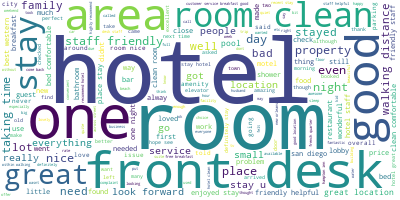

In [68]:
# Generate word cloud

# Join the different processed reviews together.
long_string = ' '.join(list(data['clean_review'].values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_file('visualizations/review_cloud.png')
wordcloud.to_image()

In [69]:
# Tokenize words
text = word_tokenize(long_string)

# Create Dictionary
id2word = corpora.Dictionary([text])

# Term Document Frequency
corpus = [id2word.doc2bow([word]) for word in text]

# View
print(corpus[:1][0][:30])

[(10938, 1)]


In [70]:
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.130*"stay" + 0.036*"well" + 0.035*"next" + 0.034*"review" + 0.033*"also" '
  '+ 0.029*"enjoyed" + 0.021*"taking" + 0.021*"didnt" + 0.021*"right" + '
  '0.018*"know"'),
 (1,
  '0.079*"clean" + 0.069*"would" + 0.052*"service" + 0.048*"bed" + '
  '0.038*"like" + 0.038*"front" + 0.029*"much" + 0.024*"staying" + 0.022*"go" '
  '+ 0.021*"street"'),
 (2,
  '0.045*"comfortable" + 0.032*"hope" + 0.027*"new" + 0.027*"make" + '
  '0.026*"look" + 0.025*"visit" + 0.022*"trip" + 0.022*"manager" + '
  '0.020*"morning" + 0.020*"appreciate"'),
 (3,
  '0.111*"staff" + 0.103*"great" + 0.070*"nice" + 0.054*"stayed" + 0.039*"day" '
  '+ 0.028*"really" + 0.022*"two" + 0.022*"floor" + 0.020*"wonderful" + '
  '0.019*"recommend"'),
 (4,
  '0.079*"breakfast" + 0.063*"location" + 0.055*"one" + 0.049*"area" + '
  '0.039*"get" + 0.030*"best" + 0.027*"inn" + 0.022*"suite" + 0.022*"feedback" '
  '+ 0.021*"little"'),
 (5,
  '0.039*"restaurant" + 0.036*"parking" + 0.029*"small" + 0.025*"even" + '
  '0.024*"w

----------------------------------------------

#### LDA Visualization with [pyLDAvis](https://pyldavis.readthedocs.io/en/latest/readme.html)

- Intertopic Distance Map shows how topics are related to each other
- Top-30 Most Salient terms provides most frequent/relevant terms within a topic. Since LDA is unsupervised, \
    this list can help with drawing meaning or context from a topic
- More about LDA topic modeling [here](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)
    
------------------------------------------------

In [71]:
# Visualize LDA output topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('visualizations/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'visualizations/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.293434 -0.104122       1        1  10.606354
9      0.060507  0.407533       2        1  10.464286
0      0.209571 -0.160476       3        1  10.366531
3      0.131095 -0.037813       4        1  10.231306
4      0.163347 -0.097000       5        1  10.133241
1     -0.107412  0.058049       6        1  10.007011
6     -0.156422 -0.034846       7        1   9.991803
2      0.061765 -0.007954       8        1   9.813533
5     -0.044892  0.003197       9        1   9.410929
7     -0.024125 -0.026567      10        1   8.975007, topic_info=         Term          Freq         Total Category  logprob  loglift
14840   hotel  22040.000000  22040.000000  Default  30.0000  30.0000
26587    room  21780.000000  21780.000000  Default  29.0000  29.0000
29777    stay  12205.000000  12205.000000  Default  28.0000  28.0000
29564   staff  10332.000000  10332.000000  Default  27.0000  27.0000
13414   great   9535.000000   9535.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
2562      bad   1134.536381   1144.754610  Topic10  -4.2674   2.4018
9701      eat    640.644353    643.337076  Topic10  -4.8389   2.4065
23239  pillow    639.684563    642.384559  Topic10  -4.8404   2.4065
31998     top    785.418982    790.580710  Topic10  -4.6352   2.4042
27026    said   1014.186137   1026.552815  Topic10  -4.3796   2.3986

[446 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
38         3  0.996150           able
38         8  0.001387           able
38        10  0.002081           able
134        2  0.998397         access
170        2  0.001644  accommodating
...      ...       ...            ...
35373      4  0.000682           year
35373      6  0.000682           year
35373      9  0.997753           year
35520      4  0.996424          youre
35520      8  0.001620          youre

[1114 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 1, 4, 5, 2, 7, 3, 6, 8])

In [72]:
# Try with more topics

# number of topics
num_topics_2 = 20

# Build LDA model
lda_model_2 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics_2)

# Print the Keyword in the 10 topics
pprint(lda_model_2.print_topics())
doc_lda_2 = lda_model_2[corpus]

[(0,
  '0.508*"hotel" + 0.304*"stay" + 0.044*"excellent" + 0.030*"shower" + '
  '0.030*"large" + 0.021*"still" + 0.008*"nicely" + 0.003*"sight" + '
  '0.002*"receptionist" + 0.001*"showing"'),
 (1,
  '0.411*"need" + 0.167*"last" + 0.047*"maker" + 0.007*"marble" + 0.004*"tony" '
  '+ 0.001*"draining" + 0.000*"room" + 0.000*"good" + 0.000*"staff" + '
  '0.000*"bad"'),
 (2,
  '0.282*"could" + 0.205*"manager" + 0.075*"second" + 0.056*"person" + '
  '0.051*"leave" + 0.047*"cost" + 0.022*"low" + 0.017*"unless" + 0.011*"hello" '
  '+ 0.006*"napa"'),
 (3,
  '0.554*"staff" + 0.250*"friendly" + 0.041*"plus" + 0.025*"request" + '
  '0.013*"tripadvisor" + 0.007*"paying" + 0.003*"butter" + 0.000*"manager" + '
  '0.000*"good" + 0.000*"room"'),
 (4,
  '0.407*"first" + 0.090*"choose" + 0.064*"usually" + 0.005*"powell" + '
  '0.000*"tha" + 0.000*"good" + 0.000*"room" + 0.000*"bad" + 0.000*"hotel" + '
  '0.000*"location"'),
 (5,
  '0.263*"door" + 0.139*"since" + 0.127*"full" + 0.073*"truly" + '
  '0.037

In [73]:
LDAvis_data_filepath = os.path.join('visualizations/ldavis_prepared_'+str(num_topics_2))

if 1 == 1:
    LDAvis_prepared_2 = pyLDAvis.gensim.prepare(lda_model_2, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared_2, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared_2 = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared_2, 'visualizations/ldavis_prepared_'+ str(num_topics_2) +'.html')
LDAvis_prepared_2

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.371402 -0.296725       1        1  6.602608
6     -0.193930  0.302709       2        1  5.566350
3     -0.143599  0.114910       3        1  5.436499
18    -0.117834  0.074027       4        1  5.357988
17    -0.094762  0.051789       5        1  5.208843
12    -0.017068  0.002345       6        1  4.995493
15    -0.020301  0.003604       7        1  4.993940
11     0.006549 -0.005714       8        1  4.967438
2      0.020983 -0.009752       9        1  4.896191
8      0.026248 -0.010996      10        1  4.893973
5      0.065604 -0.019430      11        1  4.764399
19     0.071756 -0.020393      12        1  4.748098
10     0.076700 -0.021088      13        1  4.741667
14     0.083090 -0.021883      14        1  4.741113
13     0.093252 -0.023181      15        1  4.709232
1      0.093221 -0.023175      16        1  4.706682
16     0.101121 -0.023972      17        1  4.675300
7      0.104832 -0.024289      18        1  4.669977
9      0.106444 -0.024175      19        1  4.664100
4      0.109097 -0.024611      20        1  4.660108, topic_info=          Term          Freq         Total Category  logprob  loglift
5813     clean  33137.000000  33137.000000  Default  30.0000  30.0000
14840    hotel  30272.000000  30272.000000  Default  29.0000  29.0000
29564    staff  27159.000000  27159.000000  Default  28.0000  28.0000
7792       day  24226.000000  24226.000000  Default  27.0000  27.0000
23687     pool  21366.000000  21366.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
14228  helpful      0.510705  15368.651459  Topic20 -11.3180  -7.2459
5813     clean      0.510702  33137.922974  Topic20 -11.3180  -8.0143
35219    would      0.510651  18610.833475  Topic20 -11.3181  -7.4374
34515     well      0.510649  14626.647682  Topic20 -11.3181  -7.1965
12978      get      0.510626  10200.047661  Topic20 -11.3181  -6.8361

[1131 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
38        20  0.160618       able
99         5  0.904535  abundance
99        20  0.015869  abundance
282       20  0.160626     across
468       10  0.444790       aera
...      ...       ...        ...
35219      2  0.000269      would
35219      5  0.999418      would
35219     20  0.000054      would
35373     20  0.160621       year
35445     20  0.160619       york

[493 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 4, 19, 18, 13, 16, 12, 3, 9, 6, 20, 11, 15, 14, 2, 17, 8, 10, 5])

In [74]:
# Try with fewer topics

# number of topics
num_topics_3 = 5

# Build LDA model
lda_model_3 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics_3)

# Print the Keyword in the 10 topics
pprint(lda_model_3.print_topics())
doc_lda_3 = lda_model_3[corpus]

[(0,
  '0.112*"hotel" + 0.036*"clean" + 0.028*"night" + 0.017*"experience" + '
  '0.017*"helpful" + 0.015*"parking" + 0.014*"much" + 0.014*"inn" + '
  '0.013*"see" + 0.012*"close"'),
 (1,
  '0.120*"room" + 0.055*"staff" + 0.032*"location" + 0.027*"one" + '
  '0.025*"service" + 0.022*"bed" + 0.022*"back" + 0.019*"well" + 0.019*"desk" '
  '+ 0.018*"thank"'),
 (2,
  '0.039*"time" + 0.033*"would" + 0.025*"friendly" + 0.024*"area" + '
  '0.020*"guest" + 0.019*"like" + 0.019*"review" + 0.019*"front" + '
  '0.017*"also" + 0.017*"restaurant"'),
 (3,
  '0.036*"breakfast" + 0.032*"nice" + 0.030*"good" + 0.018*"get" + '
  '0.017*"next" + 0.017*"day" + 0.011*"feedback" + 0.011*"staying" + '
  '0.011*"taking" + 0.009*"know"'),
 (4,
  '0.071*"stay" + 0.052*"great" + 0.050*"u" + 0.027*"stayed" + 0.023*"place" + '
  '0.021*"comfortable" + 0.016*"hope" + 0.014*"really" + 0.014*"could" + '
  '0.013*"new"')]


In [75]:
LDAvis_data_filepath = os.path.join('visualizations/ldavis_prepared_'+str(num_topics_3))

if 1 == 1:
    LDAvis_prepared_3 = pyLDAvis.gensim.prepare(lda_model_3, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared_3, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared_3 = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared_3, 'visualizations/ldavis_prepared_'+ str(num_topics_3) +'.html')
LDAvis_prepared_3

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.056700  0.193816       1        1  20.630848
1     -0.366399 -0.182619       2        1  19.999715
0      0.278513 -0.298763       3        1  19.999310
2      0.010642  0.060549       4        1  19.846479
4      0.020544  0.227017       5        1  19.523648, topic_info=         Term          Freq         Total Category  logprob  loglift
26587    room  21641.000000  21641.000000  Default  30.0000  30.0000
14840   hotel  20220.000000  20220.000000  Default  29.0000  29.0000
29777    stay  12453.000000  12453.000000  Default  28.0000  28.0000
29564   staff   9988.000000   9988.000000  Default  27.0000  27.0000
13414   great   9167.000000   9167.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
2711      bar   1325.752416   1328.380670   Topic5  -4.8889   1.6316
20704   never   1246.303664   1248.734826   Topic5  -4.9507   1.6316
20712     new   2299.287051   2322.257507   Topic5  -4.3382   1.6236
22910  people   1529.274576   1537.259475   Topic5  -4.7461   1.6283
4785      car   1271.837726   1275.723864   Topic5  -4.9304   1.6305

[244 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
38         2  0.002712     able
38         5  0.997176     able
282        2  0.999432   across
787        1  0.998809  airport
1051       3  0.000327     also
...      ...       ...      ...
35125      4  0.000734     work
35141      3  0.998537  working
35219      4  0.998348    would
35219      5  0.001527    would
35373      5  0.999070     year

[411 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3, 5])

## Deep Learning Methods
- complete embeddings (with visualization) using Word2Vec
- model with CNN (1D)
- model with RNN (with embedding layer, using only words that occur more than 15 times)

### Embedding with [visualizations](https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354)

In [161]:
X = data.clean_review
y = data[['good', 'great', 'not great']]
y.shape

(19995, 3)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [154]:
text_train = X_train
text_test = X_test

In [155]:
def tokenizer(text):
    tokenized_text = [word_tokenize(sentence) for sentence in text]
    return tokenized_text

X_train = tokenizer(X_train)
X_test = tokenizer(X_test)

In [79]:
word2vec = Word2Vec(sentences=X_train, size=50, min_count=1000)

In [80]:
X=word2vec[word2vec.wv.vocab]
df=pd.DataFrame(X)
print(df.shape)
df.head()

(103, 50)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.125595,0.546646,0.398221,-0.217981,0.799523,-0.729544,0.260877,-0.233547,-0.067403,-0.246213,...,0.173569,0.137958,0.671476,-0.212890,0.702101,0.221450,-0.387175,-0.270518,-0.653245,0.219790
1,0.108064,-0.077176,0.142046,0.254492,0.078631,-0.269732,-0.269350,-0.215355,0.097712,0.053599,...,-0.059794,0.392920,0.047210,0.020382,-0.460018,-0.409051,0.630427,0.264516,-0.025428,-0.005574
2,0.130673,0.121878,0.066512,0.235435,0.242903,0.053329,-0.229577,-0.175816,-0.278610,-0.176067,...,-0.292663,0.216091,0.132159,0.045269,0.011356,0.107577,-0.040977,0.197208,-0.190070,0.140583
3,0.176669,0.588524,0.116711,0.090779,0.793488,-0.704390,-0.229466,-0.393149,-0.175391,-0.817709,...,0.413299,-0.671190,0.493308,0.210822,0.309706,-0.297011,0.022378,0.060209,-0.194679,-0.256392
4,-0.245913,0.659373,-0.206926,-0.101153,0.682629,-0.115717,0.542026,-0.157829,-0.058147,-0.570658,...,0.164255,-0.288908,0.513912,-0.204331,-0.015929,0.409026,-0.206597,-0.588169,-0.367001,-0.248530


In [81]:
# Implement PCA

# Computing the correlation matrix
X_corr=df.corr()

# Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

# Sorting the eigen vectors corresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

# Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

# Projecting it onto new dimesion with 2 axis
new_X=np.dot(X,new_vectors)

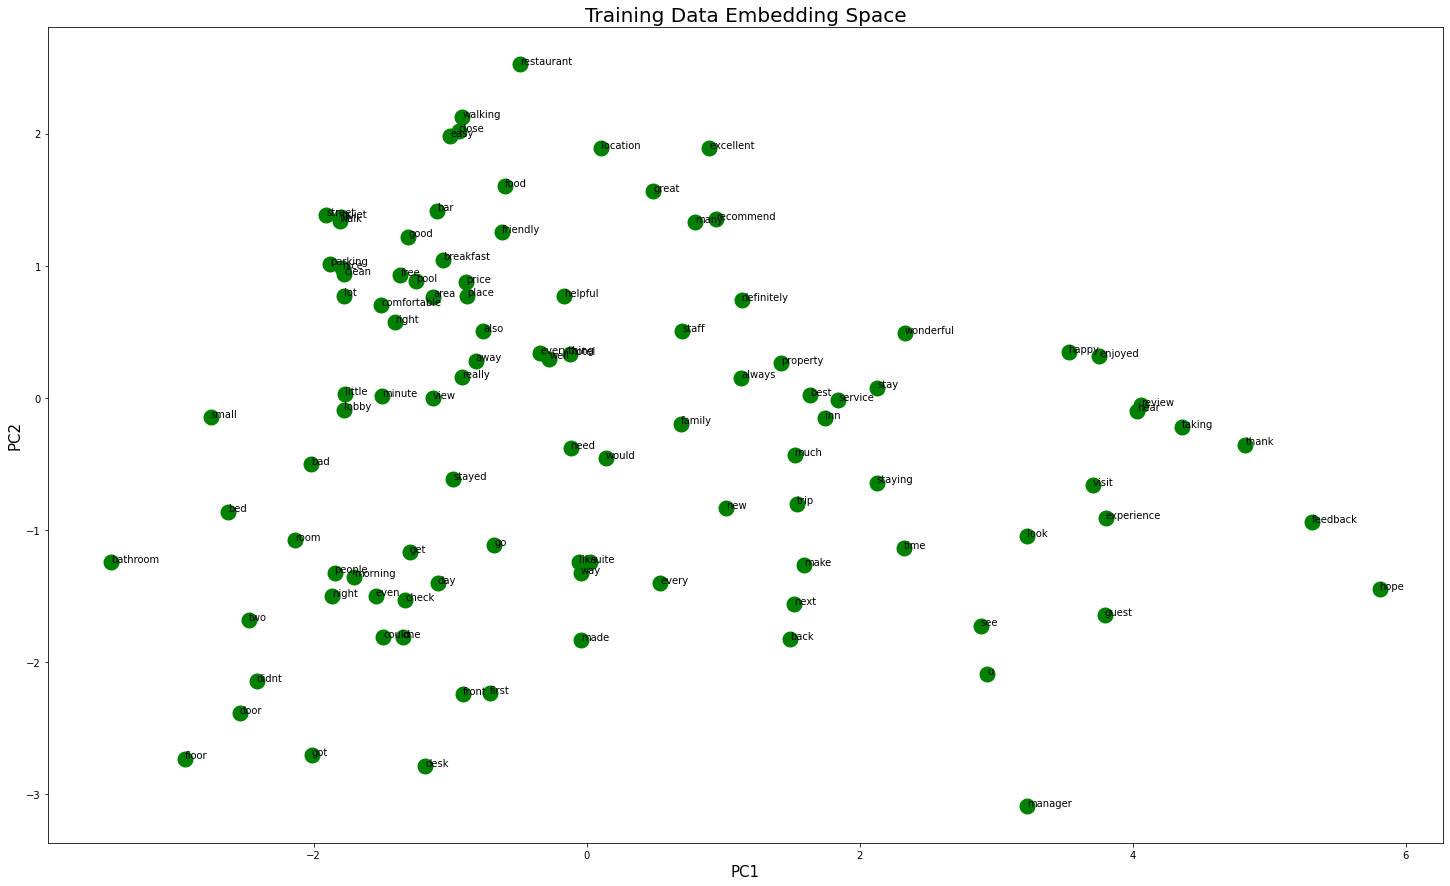

In [82]:
plt.figure(figsize=(25, 15))
plt.scatter(new_X[:,0],new_X[:,1],linewidths=10,color='green')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Training Data Embedding Space",size=20)
vocab=list(word2vec.wv.vocab)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(new_X[i,0],new_X[i,1]))
plt.savefig('visualizations/embedding_train.png')

In [83]:
# Repeat with test data

word2vec_test = Word2Vec(sentences=X_test, size=50, min_count=1000)

In [84]:
X_test = word2vec_test[word2vec_test.wv.vocab]
df_test = pd.DataFrame(X_test)
print(df_test.shape)
df_test.head()

(25, 50)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.149475,-0.089367,-0.053725,-0.085491,0.262660,0.161640,-0.186203,-0.135352,-0.086912,-0.496027,...,-0.270708,-0.137494,0.138740,-0.329140,-0.501011,-0.106201,0.050774,-0.042230,-0.428181,-0.318480
1,0.127054,-0.079218,-0.104662,-0.070142,0.222089,0.190405,-0.186759,-0.122672,-0.099675,-0.483153,...,-0.251167,-0.154793,0.171427,-0.316151,-0.519904,-0.126814,0.018799,-0.039388,-0.398498,-0.351105
2,0.138468,-0.068535,-0.123571,-0.083346,0.201931,0.208597,-0.202453,-0.125658,-0.102891,-0.499079,...,-0.236447,-0.162847,0.197156,-0.296882,-0.510667,-0.134766,0.018986,-0.041584,-0.389338,-0.363250
3,0.146814,-0.070676,-0.100278,-0.109760,0.241559,0.191254,-0.209931,-0.128875,-0.123182,-0.515691,...,-0.240626,-0.174904,0.195586,-0.293485,-0.498475,-0.102843,0.023354,-0.042834,-0.396765,-0.344195
4,0.153484,-0.072462,-0.121676,-0.073913,0.199845,0.192307,-0.201237,-0.117380,-0.112310,-0.499367,...,-0.223617,-0.171471,0.168011,-0.295306,-0.517102,-0.114088,0.023986,-0.048638,-0.390393,-0.364698


In [85]:
# Computing the correlation matrix
X_corr_test = df_test.corr()

# Computing eigen values and eigen vectors
values_test, vectors_test=np.linalg.eig(X_corr_test)

# Sorting the eigen vectors corresponding to eigen values in descending order
args_test = (-values_test).argsort()
values_test = vectors_test[args_test]
vectors_test = vectors_test[:, args_test]

# Taking first 2 components which explain maximum variance for projecting
new_vectors_test = vectors_test[:,:2]

# Projecting it onto new dimesion with 2 axis
new_X_test = np.dot(X_test, new_vectors_test)

c:\users\njeri\.venvs\smart_stay\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
c:\users\njeri\.venvs\smart_stay\lib\site-packages\matplotlib\text.py:1346: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
c:\users\njeri\.venvs\smart_stay\lib\site-packages\matplotlib\text.py:1348: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
c:\users\njeri\.venvs\smart_stay\lib\site-packages\matplotlib\text.py:824: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
c:\users\njeri\.venvs\smart_stay\lib\site-packages\matplotlib\text.py:825: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
c:\users\njeri\.venvs\smar

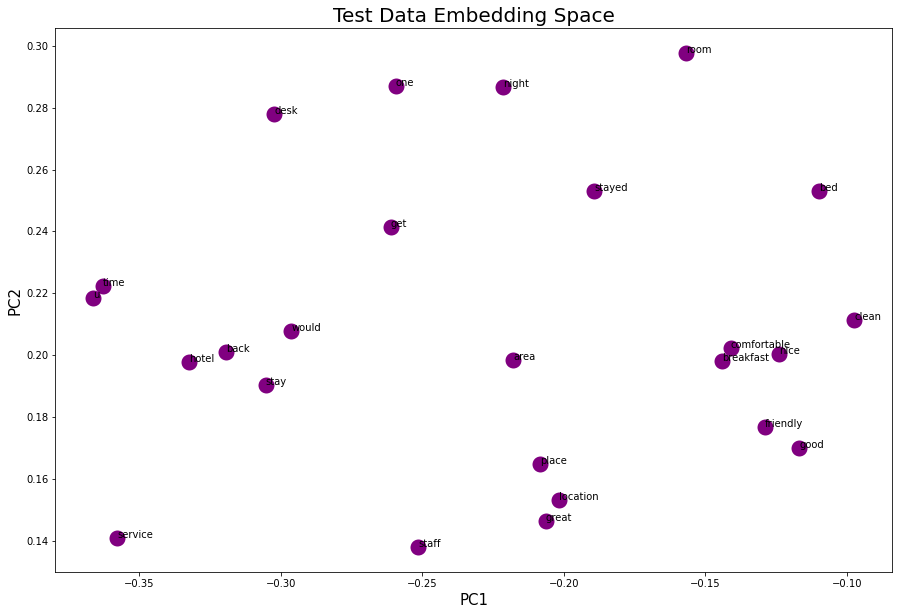

In [86]:
plt.figure(figsize=(15, 10))
plt.scatter(new_X_test[:,0],new_X_test[:,1],linewidths=10,color='purple')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Test Data Embedding Space",size=20)
vocab_test = list(word2vec_test.wv.vocab)
for i, word in enumerate(vocab_test):
  plt.annotate(word,xy=(new_X_test[i,0],new_X_test[i,1]))
plt.savefig('visualizations/embedding_test.png')

### Model with RNN

In [156]:
def embed_sentence(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
    return np.array(embedded_sentence)

def embedding(word2vec, sentences):
    embedded_sentences = [embed_sentence(word2vec, sentence) for sentence in sentences]
    return embedded_sentences
    
X_train = embedding(word2vec, text_train)
X_test = embedding(word2vec, text_test)

In [157]:
X_train_pad = pad_sequences(X_train, padding='post', value=-1000, dtype='float32')
X_test_pad = pad_sequences(X_test, padding='post', value=-1000, dtype='float32')

In [158]:
print(f'type: {type(X_train_pad)} & {type(X_test_pad)}')
print(f'shape: {X_train_pad.shape} & {X_test_pad.shape}')
print(f'embedding space: {word2vec.wv.vector_size}')
print(f'initial size: {len(X_train)} & {len(X_test)}')

type: <class 'numpy.ndarray'> & <class 'numpy.ndarray'>
shape: (13996, 185, 50) & (5999, 269, 50)
embedding space: 50
initial size: 13996 & 5999


In [163]:
y_train_arr = y_train.to_numpy()
y_test_arr = y_test.to_numpy()
y_train_arr.shape

(13996, 3)

In [165]:
# Initial RNN

def init_model():
    model = models.Sequential()
    model.add(layers.Masking(mask_value=-1000))
    model.add(layers.LSTM(30, activation='tanh'))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(3, activation='softmax')) #3-class classification
    model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])  
    return model

model = init_model()

In [166]:
es = EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X_train_pad, y_train_arr,
                    epochs=2000,
                    batch_size=32, 
                    verbose=2, 
                    callbacks=[es])

Epoch 1/2000
438/438 - 64s - loss: 1.0624 - accuracy: 0.4647
Epoch 2/2000
438/438 - 58s - loss: 1.0598 - accuracy: 0.4650
Epoch 3/2000
438/438 - 59s - loss: 1.0588 - accuracy: 0.4668
Epoch 4/2000
438/438 - 59s - loss: 1.0582 - accuracy: 0.4676
Epoch 5/2000
438/438 - 54s - loss: 1.0573 - accuracy: 0.4696
Epoch 6/2000
438/438 - 60s - loss: 1.0571 - accuracy: 0.4696
Epoch 7/2000
438/438 - 60s - loss: 1.0563 - accuracy: 0.4690
Epoch 8/2000
438/438 - 59s - loss: 1.0564 - accuracy: 0.4694
Epoch 9/2000
438/438 - 36s - loss: 1.0560 - accuracy: 0.4688
Epoch 10/2000
438/438 - 19s - loss: 1.0560 - accuracy: 0.4682
Epoch 11/2000
438/438 - 20s - loss: 1.0555 - accuracy: 0.4697
Epoch 12/2000
438/438 - 20s - loss: 1.0563 - accuracy: 0.4705
Epoch 13/2000
438/438 - 20s - loss: 1.0561 - accuracy: 0.4695
Epoch 14/2000
438/438 - 20s - loss: 1.0556 - accuracy: 0.4693
Epoch 15/2000
438/438 - 20s - loss: 1.0555 - accuracy: 0.4692
Epoch 16/2000
438/438 - 20s - loss: 1.0554 - accuracy: 0.4708
Epoch 17/2000
438

Epoch 45/2000
438/438 - 20s - loss: 1.0549 - accuracy: 0.4713
Epoch 46/2000
438/438 - 20s - loss: 1.0555 - accuracy: 0.4701
Epoch 47/2000
438/438 - 20s - loss: 1.0551 - accuracy: 0.4708
Epoch 48/2000
438/438 - 20s - loss: 1.0548 - accuracy: 0.4706
Epoch 49/2000
438/438 - 20s - loss: 1.0548 - accuracy: 0.4706
Epoch 50/2000
438/438 - 20s - loss: 1.0553 - accuracy: 0.4700
Epoch 51/2000
438/438 - 20s - loss: 1.0548 - accuracy: 0.4707
Epoch 52/2000
438/438 - 20s - loss: 1.0552 - accuracy: 0.4706
Epoch 53/2000
438/438 - 20s - loss: 1.0549 - accuracy: 0.4707
Epoch 54/2000
438/438 - 20s - loss: 1.0546 - accuracy: 0.4708
Epoch 55/2000
438/438 - 21s - loss: 1.0549 - accuracy: 0.4708
Epoch 56/2000
438/438 - 20s - loss: 1.0552 - accuracy: 0.4710
Epoch 57/2000
438/438 - 20s - loss: 1.0551 - accuracy: 0.4712
Epoch 58/2000
438/438 - 20s - loss: 1.0551 - accuracy: 0.4702
Epoch 59/2000
438/438 - 20s - loss: 1.0549 - accuracy: 0.4705
Epoch 60/2000
438/438 - 20s - loss: 1.0550 - accuracy: 0.4717
Epoch 61

Epoch 88/2000
438/438 - 20s - loss: 1.0550 - accuracy: 0.4709
Epoch 89/2000
438/438 - 20s - loss: 1.0549 - accuracy: 0.4707
Epoch 90/2000
438/438 - 20s - loss: 1.0547 - accuracy: 0.4711
Epoch 91/2000
438/438 - 23s - loss: 1.0548 - accuracy: 0.4711
Epoch 92/2000
438/438 - 21s - loss: 1.0545 - accuracy: 0.4710
Epoch 93/2000
438/438 - 21s - loss: 1.0548 - accuracy: 0.4706
Epoch 94/2000
438/438 - 21s - loss: 1.0547 - accuracy: 0.4719
Epoch 95/2000
438/438 - 20s - loss: 1.0547 - accuracy: 0.4701
Epoch 96/2000
438/438 - 20s - loss: 1.0547 - accuracy: 0.4702
Epoch 97/2000
438/438 - 20s - loss: 1.0548 - accuracy: 0.4712
Epoch 98/2000
438/438 - 21s - loss: 1.0544 - accuracy: 0.4706
Epoch 99/2000
438/438 - 20s - loss: 1.0549 - accuracy: 0.4699
Epoch 100/2000
438/438 - 20s - loss: 1.0546 - accuracy: 0.4710
Epoch 101/2000
438/438 - 20s - loss: 1.0548 - accuracy: 0.4706
Epoch 102/2000
438/438 - 19s - loss: 1.0545 - accuracy: 0.4708
Epoch 103/2000
438/438 - 19s - loss: 1.0548 - accuracy: 0.4708
Epoc

Epoch 131/2000
438/438 - 20s - loss: 1.0546 - accuracy: 0.4705
Epoch 132/2000
438/438 - 20s - loss: 1.0546 - accuracy: 0.4709
Epoch 133/2000
438/438 - 20s - loss: 1.0548 - accuracy: 0.4703
Epoch 134/2000


KeyboardInterrupt: 

In [167]:
results = model.evaluate(X_test_pad, y_test_arr, verbose=0)
print(f'accuracy = {results[1]}')

accuracy = 0.45757627487182617


--------------------------------------------------------------------

At stopping point, model is about the same as baseline in accuracy score. Stopped model due to lengthy training time. To shorten training time, try:

- using pretrained embedding space
- running on cloud

---------------------------------------------------------------------

Ideas to improve model before engineering:

- combine all text columns into one
- train-test split for Multinomial NB and LDA

## Engineering

From data & models to a deployed product:
- create package (init, setup, reqs, etc)
- check formatting with Black
- use MLflow to track performance of model iterations
- train on GCP
- build API with FastAPI and Uvicorn
- build Docker image & deploy to Cloud Run (may also consider Heroku)
- build UI; initial ideas:
    - "where do you want to go?" User input of location
    - Or could be "what do you want to do?" User input of activities with location then suggested
    - Locations show map of hotel locations (using lat/lon to locate, Taxi Fare interface as a starting point)
    - Location page shows average rating and number of ratings and some blurbs of what has been said
- consider flask or streamlit for app (dependent on which works better with Cloud Run)

## Kitt References
- Machine Learning:
    - Natural Language Processing
    - Performance Metrics
- Deep Learning:
    - Natural Langauge Processing
- Data Engineering:
    - Code as a Product
    - Machine Learning Iteration
    - Train at Scale
    - Predict in Production
    - User Interface